### Урок 3. Классификация. Логистическая регрессия.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [4]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [5]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [56]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [7]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [8]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [9]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [12]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [13]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [14]:
z = np.linspace(-10, 10, 101)

In [15]:
probabilities = sigmoid(z)

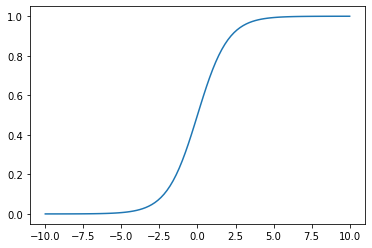

In [16]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [17]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [18]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105476
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515639
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236779


## Д/з

**2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.**

In [19]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [63]:
W = eval_model(X_st, y, iterations=4000, alpha=6)

400 [-34.59921293  -3.68542137  -9.10349889  28.8430019 ] 0.11270739342225813
800 [-38.7249703   -3.85786234 -10.48188424  31.81855571] 0.10332998163235689
1200 [-41.33206777  -4.09837301 -11.21843153  33.86954706] 0.09834658264394398
1600 [-43.68483975  -4.30095639 -11.88617047  35.74465119] 0.09436825518852361
2000 [-45.855238    -4.48468764 -12.50464622  37.46719443] 0.09099317223337697
2400 [-47.88176476  -4.65315192 -13.08469485  39.06873369] 0.08805952319573865
2800 [-49.79208851  -4.80895677 -13.6340372   40.5719968 ] 0.08546028990679706
3200 [-51.60669601  -4.95406561 -14.15833657  41.99387134] 0.08312168103101347
3600 [-53.34112514  -5.09000266 -14.6618415   43.3472312 ] 0.08099106292843397
4000 [-55.00739176  -5.21798379 -15.14779522  44.64210206] 0.0790298301860918


/home/dmitrii/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/dmitrii/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


In [64]:
W

array([-55.00739176,  -5.21798379, -15.14779522,  44.64210206])

**3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).**

In [73]:
def calc_pred_proba(W, X):
    
    m = X.shape[1]
    
    y_pred_proba = np.zeros((1, m))
    W = W.reshape(X.shape[0], 1)
    
    y_pred_proba = sigmoid(np.dot(W.T, X))
          
    return y_pred_proba

In [74]:
X_test = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [2, 2, 1, 3, 5, 5, 1, 6, 4, 1],
              [300, 200, 550, 200, 1250, 500, 1200, 1000, 250, 2500],
              [2, 2, 1, 1, 3,  2, 3, 2, 1, 1]], dtype = np.float64)

In [75]:
X_test_st = X_test.copy()
X_test_st[2, :] = calc_std_feat(X_test[2, :])

In [76]:
calc_pred_proba(W, X_test_st)

array([[1.00000000e+00, 1.00000000e+00, 3.79264294e-05, 2.50660443e-06,
        1.00000000e+00, 9.99999584e-01, 1.00000000e+00, 1.74748021e-01,
        4.50847202e-09, 7.96593350e-24]])

**4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).**

In [77]:
def calc_pred(W, X):
    
    m = X.shape[1]
    
    y_pred = np.zeros((1, m))
    W = W.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(W.T, X))
    
    for i in range(A.shape[1]):
        if (A[:,i] > 0.5): 
            y_pred[:, i] = 1
        elif (A[:,i] <= 0.5):
            y_pred[:, i] = 0
    
    return y_pred

In [108]:
y_pred_1=calc_pred(W, X_st)

In [109]:
y_pred_2=calc_pred(W, X_test_st)

**5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.**

***Accuracy***

In [110]:
def accuracy(y_pred, y_true):
    pos = (y_pred == y_true).sum()
    n = y_pred.shape[1]
    acc = pos/n
    return acc

In [111]:
accuracy(y_pred_1,y)

1.0

In [112]:
accuracy(y_pred_2,y)

0.4

***Матрица ошибок***

In [106]:
def matrix_err(y_pred, y_true):
    tp = ((y_pred == y_true) & (y_pred == 1)).sum()
    tn = ((y_pred == y_true) & (y_pred == 0)).sum()
    fn = ((y_pred != y_true) & (y_pred == 0)).sum()
    fp = ((y_pred != y_true) & (y_pred == 1)).sum()

    return np.array([[tp, fp],
                    [fn, tn]])

In [113]:
matrix_err(y_pred_1,y)

array([[5, 0],
       [0, 5]])

In [114]:
matrix_err(y_pred_2,y)

array([[2, 3],
       [3, 2]])

**precision, recall**

In [122]:
def precision_recall(y_pred, y_true):
    me = matrix_err(y_pred, y_true)
    precision = me[0][0]/(me[0][0] + me[0][1])
    recall = me[0][0]/(me[0][0] + me[1][0])
    
    return precision, recall

In [123]:
precision_recall(y_pred_1,y)

(1.0, 1.0)

In [124]:
precision_recall(y_pred_2,y)

(0.4, 0.4)

**F-score**

In [125]:
def f_score(y_pred, y_true):
    precision, recall = precision_recall(y_pred, y_true)
    f = (2 * precision * recall)/(precision+recall)
    return f

In [127]:
f_score(y_pred_1,y)

1.0

In [128]:
f_score(y_pred_2,y)

0.4000000000000001